In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

In [ ]:
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-12-31'

historical_data = {}
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)

    # Check if data is empty
    if data.empty:
        print(f"No data fetched for {ticker}.")
    else:
        historical_data[ticker] = data['Adj Close']  # Store only adjusted close prices

# Print historical data to check structure
print("\nHistorical Data:")
for ticker, series in historical_data.items():
    print(f"{ticker} data:")
    print(series.head())  # Print first few rows of each

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Historical Data:
TSLA data:
Ticker                          TSLA
Date                                
2015-01-02 00:00:00+00:00  14.620667
2015-01-05 00:00:00+00:00  14.006000
2015-01-06 00:00:00+00:00  14.085333
2015-01-07 00:00:00+00:00  14.063333
2015-01-08 00:00:00+00:00  14.041333
BND data:
Ticker                           BND
Date                                
2015-01-02 00:00:00+00:00  63.358746
2015-01-05 00:00:00+00:00  63.542747
2015-01-06 00:00:00+00:00  63.726692
2015-01-07 00:00:00+00:00  63.765064
2015-01-08 00:00:00+00:00  63.665401
SPY data:
Ticker                            SPY
Date                                 
2015-01-02 00:00:00+00:00  173.173798
2015-01-05 00:00:00+00:00  170.046295
2015-01-06 00:00:00+00:00  168.444656
2015-01-07 00:00:00+00:00  170.543640
2015-01-08 00:00:00+00:00  173.569962


In [ ]:
try:
    combined_data = pd.concat(historical_data.values(), axis=1)
    combined_data.columns = historical_data.keys()  # Set the column names
    print("\nCombined Data:")
    print(combined_data.head())
except ValueError as e:
    print(f"Error creating DataFrame with concat: {e}")


Combined Data:
                                TSLA        BND         SPY
Date                                                       
2015-01-02 00:00:00+00:00  14.620667  63.358746  173.173798
2015-01-05 00:00:00+00:00  14.006000  63.542747  170.046295
2015-01-06 00:00:00+00:00  14.085333  63.726692  168.444656
2015-01-07 00:00:00+00:00  14.063333  63.765064  170.543640
2015-01-08 00:00:00+00:00  14.041333  63.665401  173.569962


In [ ]:
print(combined_data.describe())

              TSLA          BND          SPY
count  2482.000000  2482.000000  2482.000000
mean    111.986208    70.098070   311.134605
std     110.383426     4.884508   112.150254
min       9.578000    62.637581   157.328629
25%      17.095834    66.331333   214.883583
50%      25.171000    68.918324   276.083481
75%     217.778336    73.800356   402.721985
max     409.970001    79.812920   598.760010


In [ ]:
print("\nMissing values:")
print(combined_data.isnull().sum())


Missing values:
TSLA    0
BND     0
SPY     0
dtype: int64


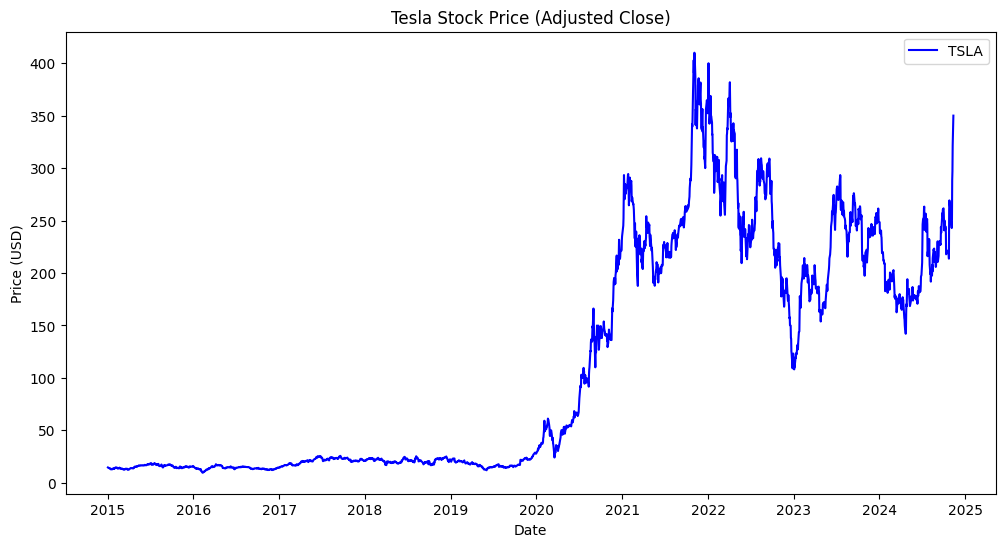

In [ ]:
import matplotlib.pyplot as plt

# Plot the Tesla stock price
plt.figure(figsize=(12, 6))
plt.plot(combined_data['TSLA'], color='blue', label='TSLA')
plt.title('Tesla Stock Price (Adjusted Close)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Handle missing values
combined_data.fillna(method='ffill', inplace=True)

# Check for stationarity
adf_result = adfuller(combined_data['TSLA'].dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

if adf_result[1] > 0.05:
    print("The series is not stationary. Applying differencing.")
    combined_data['TSLA_diff'] = combined_data['TSLA'].diff().dropna()
else:
    combined_data['TSLA_diff'] = combined_data['TSLA']


ADF Statistic: -0.6971680501567756
p-value: 0.8474817136522983
The series is not stationary. Applying differencing.


<ipython-input-9-82f94f1f54cc>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Handle missing values
combined_data.fillna(method='ffill', inplace=True)

# Check for stationarity
adf_result = adfuller(combined_data['TSLA'].dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

if adf_result[1] > 0.05:
    print("The series is not stationary. Applying differencing.")
    combined_data['TSLA_diff'] = combined_data['TSLA'].diff()
    combined_data.dropna(subset=['TSLA_diff'], inplace=True)  # Drop NaN values from differencing
else:
    combined_data['TSLA_diff'] = combined_data['TSLA']


<ipython-input-10-bfd1d7c7f470>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)


ADF Statistic: -0.6971680501567756
p-value: 0.8474817136522983
The series is not stationary. Applying differencing.


In [ ]:
# Apply first differencing
combined_data['TSLA_diff'] = combined_data['TSLA'].diff()
combined_data.dropna(subset=['TSLA_diff'], inplace=True)  # Remove NaN values from differencing

# Re-check for stationarity on the differenced series
adf_result_diff = adfuller(combined_data['TSLA_diff'])
print("ADF Statistic after differencing:", adf_result_diff[0])
print("p-value after differencing:", adf_result_diff[1])

if adf_result_diff[1] <= 0.05:
    print("The differenced series is stationary.")
else:
    print("The differenced series is still not stationary. Further differencing may be required.")


ADF Statistic after differencing: -9.724945087524452
p-value after differencing: 9.328130900792411e-17
The differenced series is stationary.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                      SARIMAX Results                                       
Dep. Variable:                            TSLA_diff   No. Observations:                 2480
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -7971.857
Date:                              Tue, 12 Nov 2024   AIC                          15957.714
Time:                                      07:34:34   BIC                          15998.389
Sample:                                           0   HQIC                         15972.491
                                             - 2480                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0039      0.019    -53.698      0.000      -1.041      -0.967
ar.L2         -0.01

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


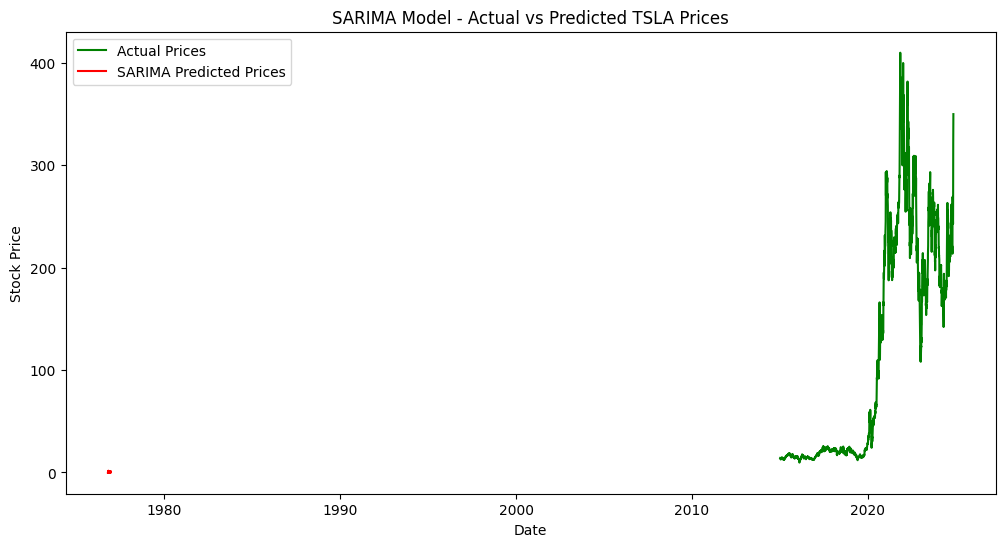

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define and fit the SARIMA model
sarima_model = SARIMAX(combined_data['TSLA_diff'].dropna(), order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()
print(sarima_results.summary())

# Forecast future values
sarima_forecast = sarima_results.get_forecast(steps=60)
sarima_predicted = sarima_forecast.predicted_mean

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(combined_data['TSLA'], label='Actual Prices', color='green')
plt.plot(sarima_predicted, label='SARIMA Predicted Prices', color='red')
plt.title("SARIMA Model - Actual vs Predicted TSLA Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_0tfcty2/b87gfi78.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_0tfcty2/ufpr480x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17157', 'data', 'file=/tmp/tmp_0tfcty2/b87gfi78.json', 'init=/tmp/tmp_0tfcty2/ufpr480x.json', 'output', 'file=/tmp/tmp_0tfcty2/prophet_model83aticta/prophet_model-20241112073454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


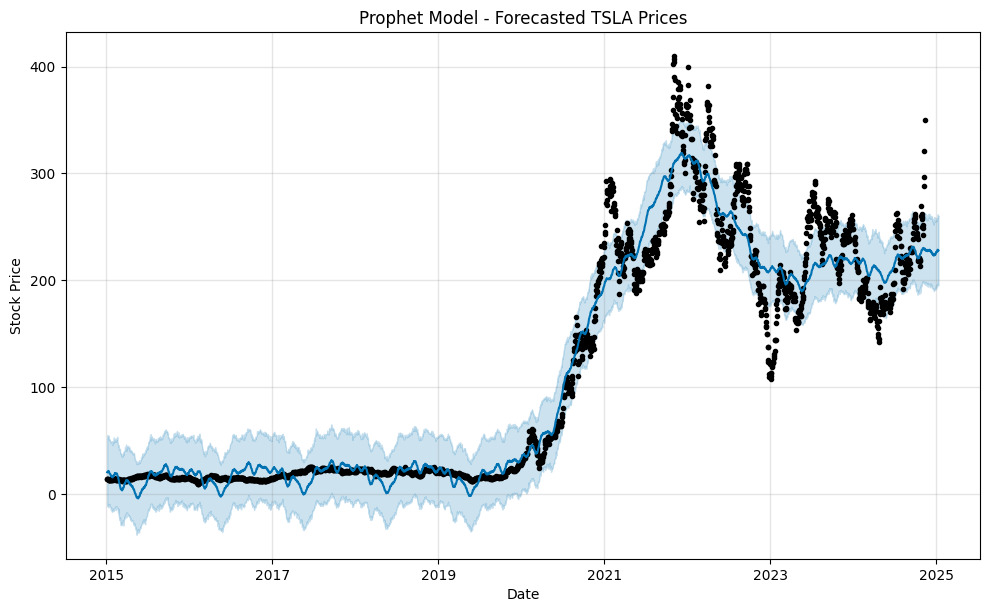

In [ ]:
from prophet import Prophet

# Prepare data for Prophet
prophet_df = combined_data['TSLA'].reset_index().rename(columns={'Date': 'ds', 'TSLA': 'y'})

# Convert 'ds' column to datetime objects and remove timezone information
prophet_df['ds'] = pd.to_datetime(prophet_df['ds']).dt.tz_localize(None)

# Define and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# Forecast future values
future_dates = prophet_model.make_future_dataframe(periods=60)
forecast = prophet_model.predict(future_dates)

# Plot forecast
prophet_model.plot(forecast)
plt.title("Prophet Model - Forecasted TSLA Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0325
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0011
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0010
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 9.4010e-04
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 8.5861e-04
Epoch 6/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 7.0691e-04
Epoch 7/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - loss: 6.4915e-04
Epoch 8/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 5.9952e-04
Epoch 9/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 6.3528e-04
Epoch 10/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 5.2336e-04
Epoch 11/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 5.5093e-04
Epoch 12/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 5.0933e-04
Epoch 13/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 5.1736e-04
Epoch 14/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 4.5635e-04
Epoch 15/20
76/76 ━━━━━━━━━━━━━━━━

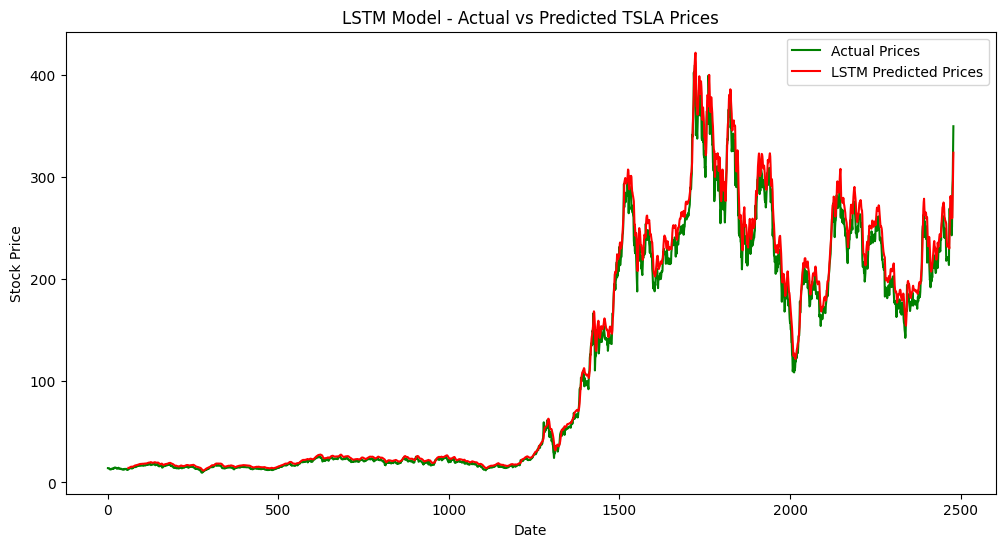

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(combined_data['TSLA'].values.reshape(-1, 1))

# Prepare the dataset for LSTM
X, y = [], []
lookback = 60
for i in range(lookback, len(scaled_data)):
    X.append(scaled_data[i-lookback:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Define LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=20, batch_size=32)

# Make predictions
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(combined_data['TSLA'].values, color='green', label='Actual Prices')
plt.plot(np.arange(lookback, len(predicted_prices) + lookback), predicted_prices, color='red', label='LSTM Predicted Prices')
plt.title("LSTM Model - Actual vs Predicted TSLA Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/stat

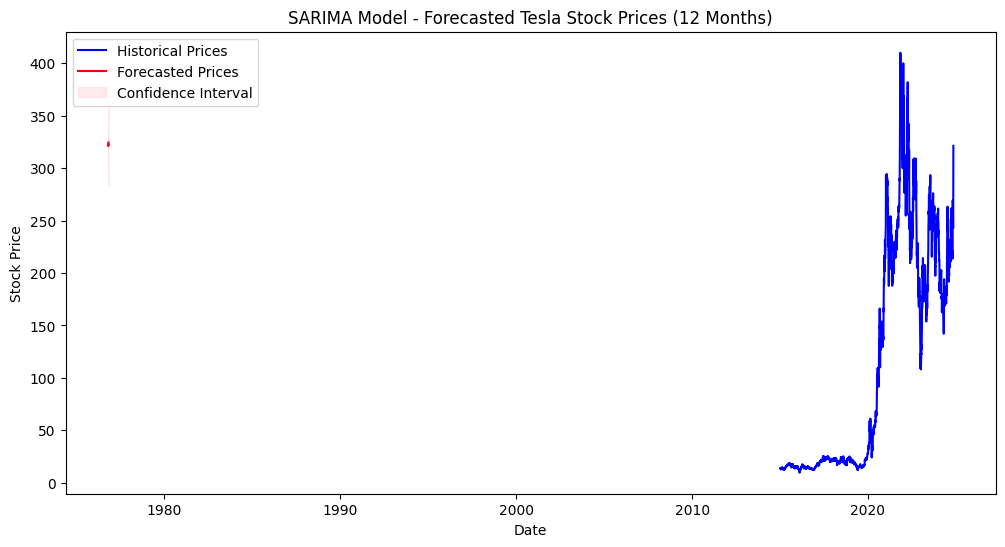

2479    321.705644
2480    322.580585
2481    322.126029
2482    322.277511
2483    321.803224
2484    321.519503
2485    322.944571
2486    321.770241
2487    322.872147
2488    323.468804
2489    323.492562
2490    324.381056
Name: predicted_mean, dtype: float64
Confidence Intervals:
       lower TSLA  upper TSLA
2479  309.967111  333.444176
2480  306.021642  339.139527
2481  301.732003  342.520054
2482  298.824082  345.730939
2483  295.499412  348.107037
2484  292.744224  350.294782
2485  291.858461  354.030682
2486  288.507749  355.032732
2487  287.637862  358.106431
2488  286.276144  360.661464
2489  284.524489  362.460635
2490  283.657970  365.104141


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Retraining the SARIMA model with optimized parameters (update as needed)
sarima_model = SARIMAX(combined_data['TSLA'], order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()

# Forecast for the next 12 months (adjust steps as needed)
forecast_steps = 12
forecast = sarima_results.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plotting the forecast alongside historical data
plt.figure(figsize=(12, 6))
plt.plot(combined_data['TSLA'], label='Historical Prices', color='blue')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecasted Prices')
plt.fill_between(forecast_values.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title("SARIMA Model - Forecasted Tesla Stock Prices (12 Months)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Printing the forecast values
print(forecast_values)
print("Confidence Intervals:\n", confidence_intervals)


## Forecasted Future Market Trends

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


<ipython-input-16-ef5eb5a916df>:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=combined_data.index[-1], periods=13, freq='M')[1:], predictions, color='red', marker='o', label='LSTM Forecasted Prices')


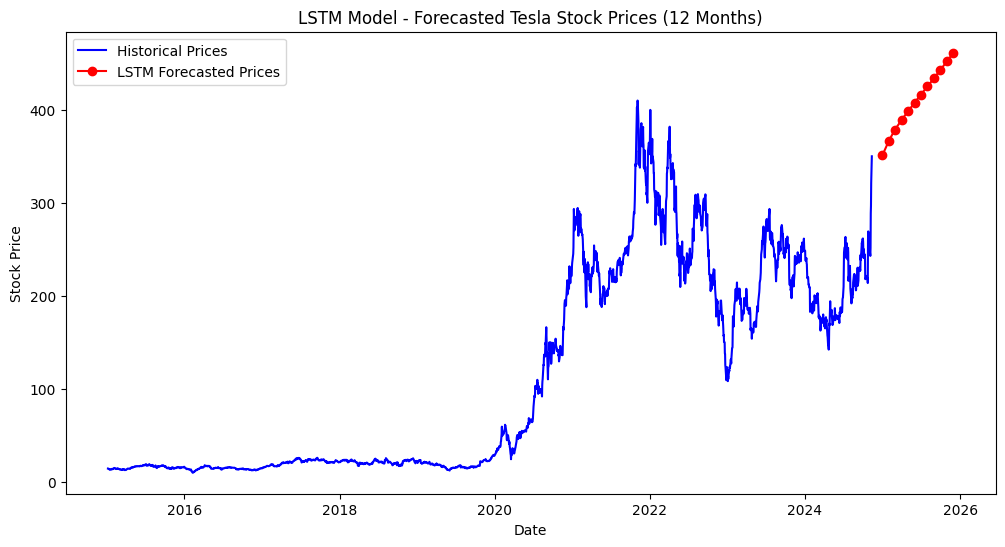

LSTM Forecasted Prices:
 [351.2298  366.9832  378.74124 388.93753 398.39157 407.45648 416.34195
 425.18906 434.08823 443.08746 452.2027  461.42807]


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Data preparation
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(combined_data['TSLA'].values.reshape(-1, 1))

# Preparing the input sequences for forecasting (using lookback of 60 days)
lookback = 60
X_test = scaled_data[-lookback:].reshape(1, lookback, 1)

# Forecast for the next 12 months (12 steps ahead)
predictions = []
for _ in range(12):
    next_pred = model.predict(X_test)
    predictions.append(next_pred[0, 0])
    # Update the input sequence for the next prediction
    X_test = np.append(X_test[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)

# Inverse transform the predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Plot the LSTM predictions
plt.figure(figsize=(12, 6))
plt.plot(combined_data['TSLA'], color='blue', label='Historical Prices')
plt.plot(pd.date_range(start=combined_data.index[-1], periods=13, freq='M')[1:], predictions, color='red', marker='o', label='LSTM Forecasted Prices')
plt.title("LSTM Model - Forecasted Tesla Stock Prices (12 Months)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Printing the LSTM predictions
print("LSTM Forecasted Prices:\n", predictions.flatten())


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0208
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0012
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0011
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 8.8160e-04
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 9.2349e-04
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 6.5812e-04
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 7.8632e-04
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 5.8911e-04
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 9.0810e-04
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 5.4289e-04
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 6.5236e-04
Epoch 12/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 7.3532e-04
Epoch 13/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 7.6119e-04
Epoch 14/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 4.4614e-04
Epoch 15/20
61/61 ━━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━

<ipython-input-17-65ab324b637d>:78: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=combined_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]


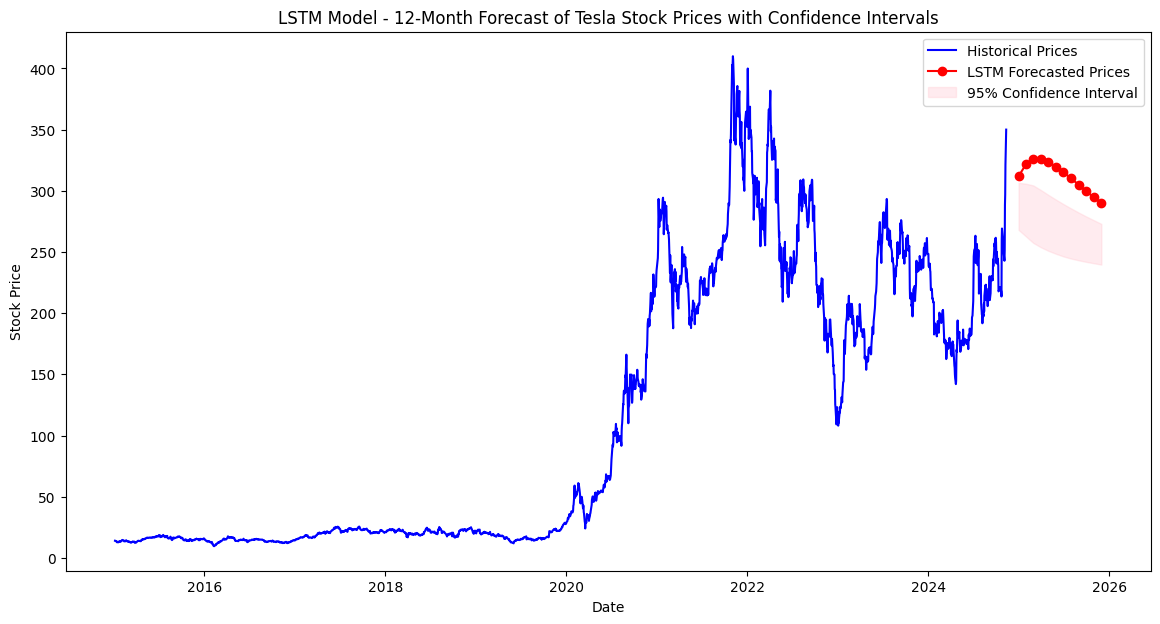

                           Forecasted Prices  Lower Bound  Upper Bound
2024-12-31 00:00:00+00:00         311.826660   268.055476   306.560601
2025-01-31 00:00:00+00:00         322.119141   262.533437   305.745994
2025-02-28 00:00:00+00:00         325.799194   257.472398   304.415323
2025-03-31 00:00:00+00:00         325.780518   253.845198   300.632365
2025-04-30 00:00:00+00:00         323.501984   250.981411   296.672915
2025-05-31 00:00:00+00:00         319.792206   248.533803   292.775446
2025-06-30 00:00:00+00:00         315.198273   246.378765   289.150735
2025-07-31 00:00:00+00:00         310.118866   244.637579   285.596394
2025-08-31 00:00:00+00:00         304.856842   243.188035   282.182089
2025-09-30 00:00:00+00:00         299.638702   241.932841   279.007081
2025-10-31 00:00:00+00:00         294.625000   240.795119   275.933879
2025-11-30 00:00:00+00:00         289.918640   239.716735   272.976570


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import load_model

# Step 1: Data Preparation
data = combined_data['TSLA'].values.reshape(-1, 1)

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the lookback period (e.g., last 60 days)
lookback = 60
X_test = scaled_data[-lookback:].reshape(1, lookback, 1)

# Step 2: Load the Pre-trained LSTM Model (or retrain if necessary)
try:
    model = load_model('lstm_model.h5')  
except:
    # If the model is not available, define and train a new LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(lookback, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Split data for training (80% train, 20% test)
    train_size = int(len(scaled_data) * 0.8)
    X_train, y_train = [], []
    for i in range(lookback, train_size):
        X_train.append(scaled_data[i-lookback:i, 0])
        y_train.append(scaled_data[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1, 1)

    # Reshape for LSTM input
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

    # Train the LSTM model
    model.fit(X_train, y_train, epochs=20, batch_size=32)
    model.save('lstm_model.h5')

# Step 3: Generate Forecast for the Next 12 Months
forecast_steps = 12
predictions = []
for _ in range(forecast_steps):
    next_pred = model.predict(X_test)[0, 0]
    predictions.append(next_pred)
    # Update the input for the next step prediction
    X_test = np.append(X_test[:, 1:, :], [[[next_pred]]], axis=1)

# Inverse transform the predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Step 4: Calculate Confidence Intervals using Bootstrapping
# Generating 100 bootstrap samples for confidence intervals
bootstrap_preds = []
for _ in range(100):
    noise = np.random.normal(0, 0.05, size=X_test.shape)  # Add some noise
    bootstrap_X = X_test + noise
    bootstrap_pred = []
    for _ in range(forecast_steps):
        next_pred = model.predict(bootstrap_X)[0, 0]
        bootstrap_pred.append(next_pred)
        bootstrap_X = np.append(bootstrap_X[:, 1:, :], [[[next_pred]]], axis=1)
    bootstrap_preds.append(scaler.inverse_transform(np.array(bootstrap_pred).reshape(-1, 1)).flatten())

# Calculate 95% confidence intervals
bootstrap_preds = np.array(bootstrap_preds)
lower_bound = np.percentile(bootstrap_preds, 2.5, axis=0)
upper_bound = np.percentile(bootstrap_preds, 97.5, axis=0)

# Step 5: Visualization
forecast_dates = pd.date_range(start=combined_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]

plt.figure(figsize=(14, 7))
plt.plot(combined_data['TSLA'], color='blue', label='Historical Prices')
plt.plot(forecast_dates, predictions.flatten(), color='red', marker='o', label='LSTM Forecasted Prices')
plt.fill_between(forecast_dates, lower_bound, upper_bound, color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title("LSTM Model - 12-Month Forecast of Tesla Stock Prices with Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Print the forecasted prices and confidence intervals
forecast_df = pd.DataFrame({
    "Forecasted Prices": predictions.flatten(),
    "Lower Bound": lower_bound,
    "Upper Bound": upper_bound
}, index=forecast_dates)

print(forecast_df)


<ipython-input-18-b42d99c6d935>:56: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=combined_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Forecasted data saved to 'forecasted_prices.csv'.


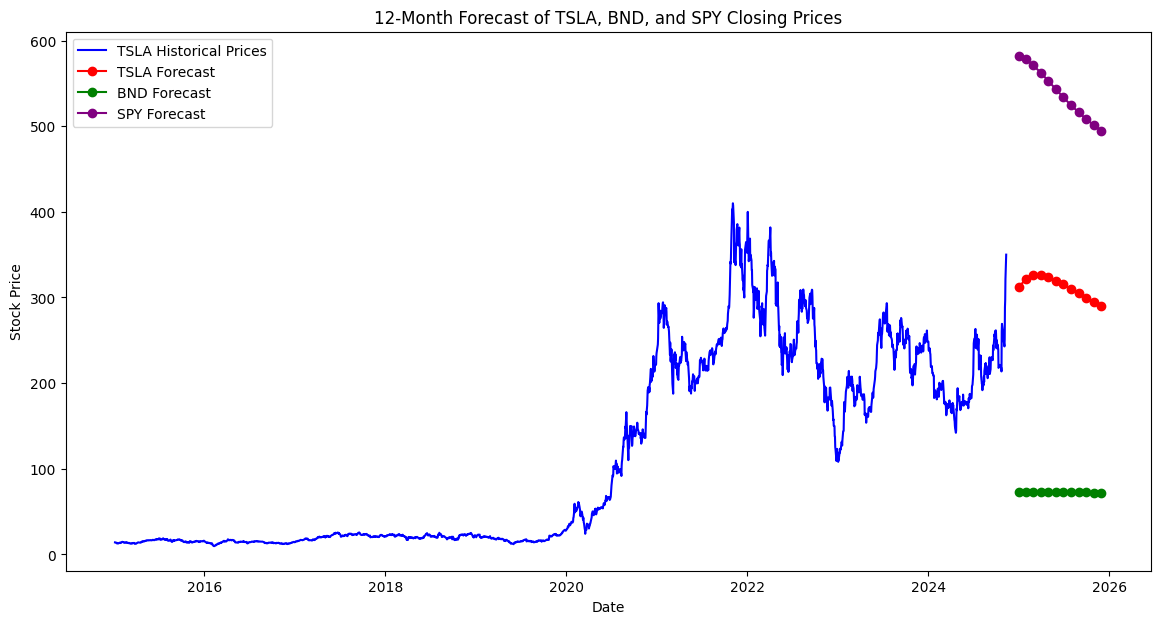

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import load_model

# Function to forecast for a given stock symbol
def forecast_stock(data, model_file='lstm_model.h5', lookback=60, forecast_steps=12):
    # Step 1: Data Preparation
    data_values = data.values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data_values)

    # Prepare the test input
    X_test = scaled_data[-lookback:].reshape(1, lookback, 1)

    # Step 2: Load or Train the LSTM Model
    try:
        model = load_model(model_file)
    except:
        # Define and train a new model if not available
        model = Sequential()
        model.add(LSTM(50, return_sequences=True, input_shape=(lookback, 1)))
        model.add(LSTM(50, return_sequences=False))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Split data for training
        train_size = int(len(scaled_data) * 0.8)
        X_train, y_train = [], []
        for i in range(lookback, train_size):
            X_train.append(scaled_data[i-lookback:i, 0])
            y_train.append(scaled_data[i, 0])
        X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1, 1)
        X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

        # Train the model
        model.fit(X_train, y_train, epochs=20, batch_size=32)
        model.save(model_file)

    # Step 3: Generate Forecast
    predictions = []
    for _ in range(forecast_steps):
        next_pred = model.predict(X_test)[0, 0]
        predictions.append(next_pred)
        X_test = np.append(X_test[:, 1:, :], [[[next_pred]]], axis=1)

    # Inverse transform the predictions
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
    return predictions

# Step 4: Generate Forecasts for TSLA, BND, and SPY
forecast_steps = 12
forecast_dates = pd.date_range(start=combined_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Forecast for TSLA
tsla_predictions = forecast_stock(combined_data['TSLA'])
# Forecast for BND
bnd_predictions = forecast_stock(combined_data['BND'])
# Forecast for SPY
spy_predictions = forecast_stock(combined_data['SPY'])

# Step 5: Combine Forecasts into a DataFrame
forecasted_df = pd.DataFrame({
    'Date': forecast_dates,
    'TSLA_Forecast': tsla_predictions,
    'BND_Forecast': bnd_predictions,
    'SPY_Forecast': spy_predictions
})

# Step 6: Save the Forecasted Data to a CSV File
forecasted_df.to_csv('forecasted_prices.csv', index=False)
print("Forecasted data saved to 'forecasted_prices.csv'.")

# Step 7: Visualization
plt.figure(figsize=(14, 7))
plt.plot(combined_data['TSLA'], color='blue', label='TSLA Historical Prices')
plt.plot(forecast_dates, tsla_predictions, color='red', marker='o', label='TSLA Forecast')
plt.plot(forecast_dates, bnd_predictions, color='green', marker='o', label='BND Forecast')
plt.plot(forecast_dates, spy_predictions, color='purple', marker='o', label='SPY Forecast')
plt.title("12-Month Forecast of TSLA, BND, and SPY Closing Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


## Task 4 Optimize Portfolio Based on Forecast

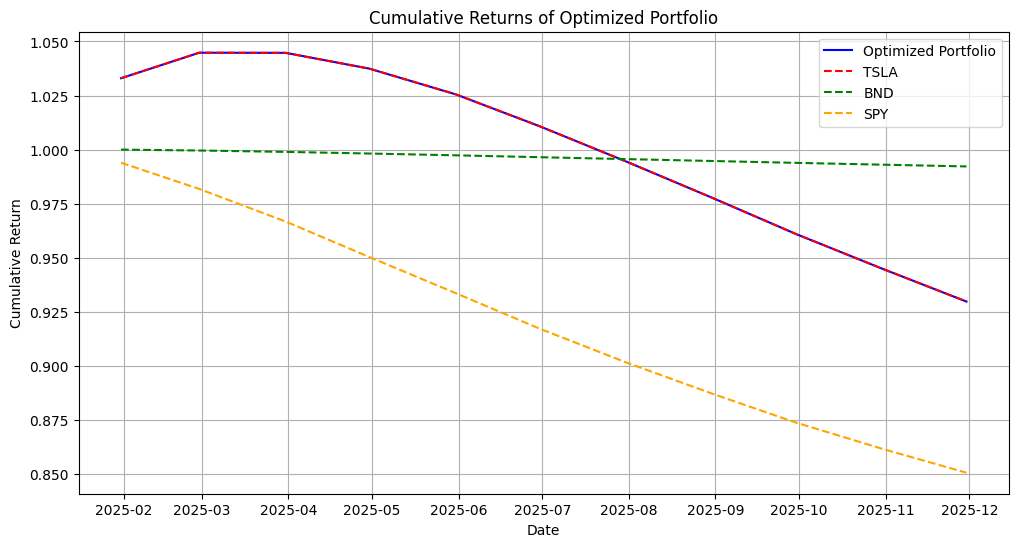

Optimized Portfolio Summary:
Expected Annual Return: -163.48%
Portfolio Volatility (Risk): 25.20%
Sharpe Ratio: -6.49
Value at Risk (VaR) for TSLA at 95% Confidence: -1.70%

Asset Allocation:
     Asset        Weight  Annual Return  Volatility
TSLA  TSLA  1.000000e+00      -1.634764    0.251979
BND    BND  6.679102e-13      -0.178757    0.004376
SPY    SPY  5.508594e-12      -3.678763    0.053795


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load the forecasted data for TSLA, BND, and SPY
# Assume `forecast_df` contains forecasted closing prices for TSLA, BND, and SPY
# Columns: ['TSLA', 'BND', 'SPY']
forecast_df = pd.read_csv('forecasted_prices.csv', index_col='Date', parse_dates=True)

# Calculate daily returns
returns = forecast_df.pct_change().dropna()

# Annualized return and covariance matrix
annual_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

# Define the portfolio weights (initial guess: equal weights)
num_assets = len(annual_returns)
weights = np.array([1/num_assets] * num_assets)

# Function to calculate portfolio metrics
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = portfolio_return / portfolio_volatility
    return portfolio_return, portfolio_volatility, sharpe_ratio

# Objective function to maximize Sharpe Ratio (minimize the negative Sharpe Ratio)
def negative_sharpe_ratio(weights, returns, cov_matrix):
    return -portfolio_performance(weights, returns, cov_matrix)[2]

# Constraints: Weights must sum to 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds for weights: between 0 and 1
bounds = tuple((0, 1) for asset in range(num_assets))

# Perform optimization to find optimal weights
optimal_result = minimize(negative_sharpe_ratio, weights, args=(annual_returns, cov_matrix),
                          method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = optimal_result.x

# Compute the optimized portfolio metrics
opt_return, opt_volatility, opt_sharpe = portfolio_performance(optimal_weights, annual_returns, cov_matrix)

# Value at Risk (VaR) Calculation for TSLA at 95% confidence level
alpha = 0.05
var_tsla = np.percentile(returns['TSLA_Forecast'], alpha * 100)

# Create a DataFrame for analysis
portfolio_summary = pd.DataFrame({
    'Asset': ['TSLA', 'BND', 'SPY'],
    'Weight': optimal_weights,
    'Annual Return': annual_returns.values,  # Use .values to get the values as a NumPy array
    'Volatility': np.sqrt(np.diag(cov_matrix))
}, index=annual_returns.index)  # Set index to align with asset names

portfolio_summary.index = portfolio_summary.index.str.replace('_Forecast', '') # Remove '_Forecast' suffix

# Plotting the Cumulative Returns of the Portfolio
cumulative_returns = (1 + returns).cumprod()
cumulative_returns['Portfolio'] = (cumulative_returns.dot(optimal_weights))

plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns.index, cumulative_returns['Portfolio'], label='Optimized Portfolio', color='blue')
plt.plot(cumulative_returns.index, cumulative_returns['TSLA_Forecast'], label='TSLA', color='red', linestyle='--')
plt.plot(cumulative_returns.index, cumulative_returns['BND_Forecast'], label='BND', color='green', linestyle='--')
plt.plot(cumulative_returns.index, cumulative_returns['SPY_Forecast'], label='SPY', color='orange', linestyle='--')
plt.title('Cumulative Returns of Optimized Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()

# Print Portfolio Summary
print("Optimized Portfolio Summary:")
print(f"Expected Annual Return: {opt_return:.2%}")
print(f"Portfolio Volatility (Risk): {opt_volatility:.2%}")
print(f"Sharpe Ratio: {opt_sharpe:.2f}")
print(f"Value at Risk (VaR) for TSLA at 95% Confidence: {var_tsla:.2%}")
print("\nAsset Allocation:")
print(portfolio_summary)



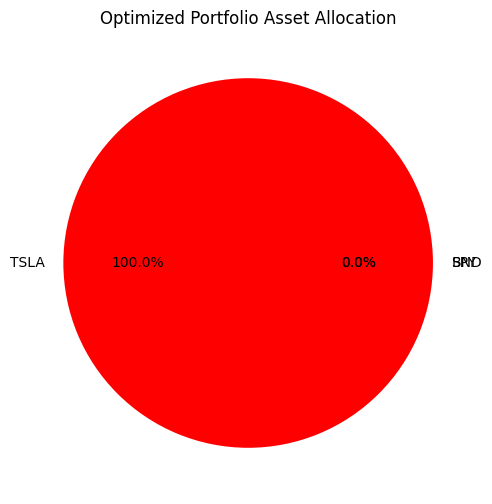

In [23]:
# Plot 2: Asset Allocation Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(optimal_weights, labels=portfolio_summary.index, autopct='%1.1f%%', colors=['red', 'green', 'orange'])
plt.title('Optimized Portfolio Asset Allocation')
plt.show()

<ipython-input-24-c202f3796c4e>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (portfolio_summary['Volatility'][i], portfolio_summary['Annual Return'][i]), fontsize=12)


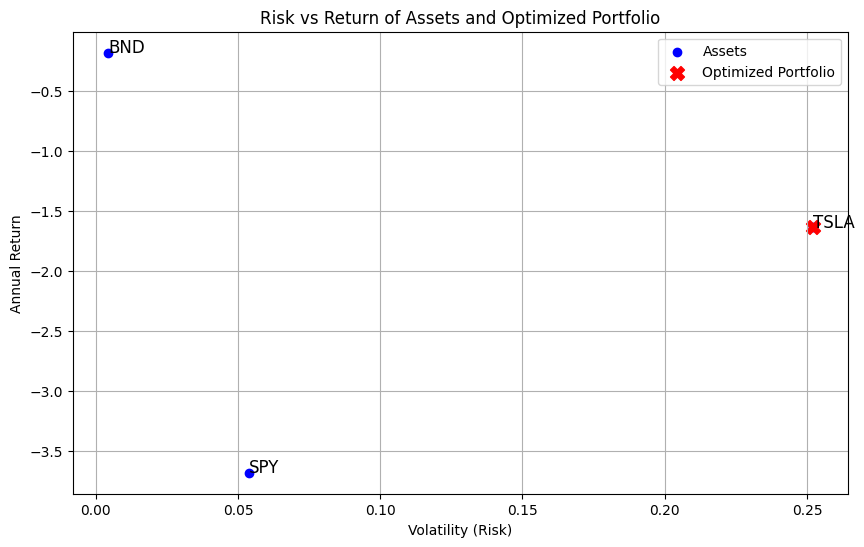

In [24]:
# Plot 3: Risk-Return Plot
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_summary['Volatility'], portfolio_summary['Annual Return'], color='blue', label='Assets')
plt.scatter(opt_volatility, opt_return, color='red', marker='X', s=100, label='Optimized Portfolio')
for i, txt in enumerate(portfolio_summary.index):
    plt.annotate(txt, (portfolio_summary['Volatility'][i], portfolio_summary['Annual Return'][i]), fontsize=12)
plt.xlabel('Volatility (Risk)')
plt.ylabel('Annual Return')
plt.title('Risk vs Return of Assets and Optimized Portfolio')
plt.legend()
plt.grid()
plt.show()

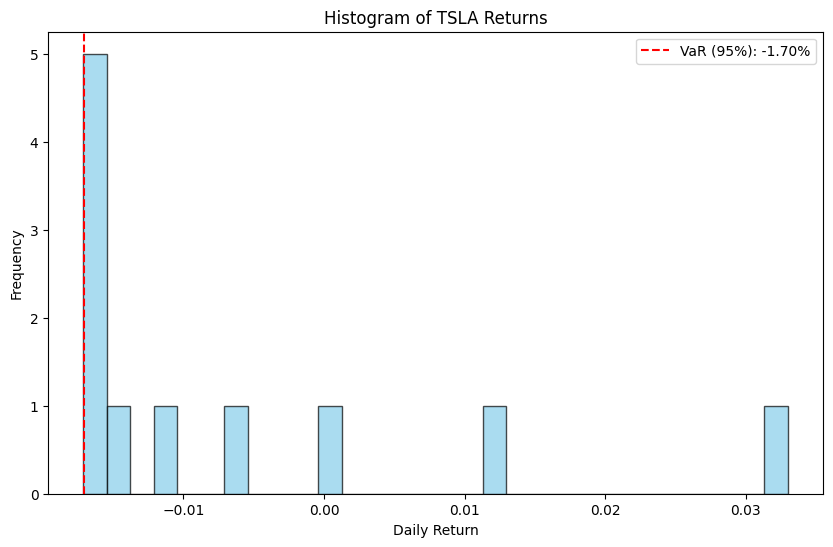

In [25]:
# Plot 4: Histogram of TSLA Returns
plt.figure(figsize=(10, 6))
plt.hist(returns['TSLA_Forecast'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(var_tsla, color='red', linestyle='dashed', linewidth=1.5, label=f'VaR (95%): {var_tsla:.2%}')
plt.title('Histogram of TSLA Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [26]:
# Print Portfolio Summary
print("Optimized Portfolio Summary:")
print(f"Expected Annual Return: {opt_return:.2%}")
print(f"Portfolio Volatility (Risk): {opt_volatility:.2%}")
print(f"Sharpe Ratio: {opt_sharpe:.2f}")
print(f"Value at Risk (VaR) for TSLA at 95% Confidence: {var_tsla:.2%}")
print("\nAsset Allocation:")
print(portfolio_summary)

Optimized Portfolio Summary:
Expected Annual Return: -163.48%
Portfolio Volatility (Risk): 25.20%
Sharpe Ratio: -6.49
Value at Risk (VaR) for TSLA at 95% Confidence: -1.70%

Asset Allocation:
     Asset        Weight  Annual Return  Volatility
TSLA  TSLA  1.000000e+00      -1.634764    0.251979
BND    BND  6.679102e-13      -0.178757    0.004376
SPY    SPY  5.508594e-12      -3.678763    0.053795
